# Principal Components Analysis

Algortihm
1. Strandarize the d-dim data
2. Construct Co-variance Matrix
3. Decompose the co variance matix into its eigen vectors and Values
4. Sort the eigen vector by decreasing order to rank the corresponding eigen vectors.
5. Select k- eigen vectors which correspond tok largest eigen values, whee k is dim. of new featue space (k < d)
6. Construct a prokection matrix W from top k eigen vectors.
7. Transform the d dim input data set X, using projection matrix W, to obtain the new k dim feature space.

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X, y = df.iloc[:,1:].values , df.iloc[:,0].values

In [13]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify =y, random_state =0)

In [16]:
#standarize the data

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [103]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
#rigen valuea dn vectors

In [20]:
import numpy as np


In [21]:
cov_mat = np.cov(X_train_std.T)

In [22]:
cov_mat

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

In [23]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [42]:
print(eigen_vals)
print(eigen_vals[1])
print("------------------------------------------------")
print(eigen_vecs)
print("aaaaaaaaaaaaaa")
print(eigen_vecs[:,1])

[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]
2.4160245870352255
------------------------------------------------
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -

#### total and Explained Variance

In [28]:
tot = sum(eigen_vals)

In [29]:
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

In [30]:
var_exp

[0.3695146859960766,
 0.18434927059884168,
 0.11815159094596975,
 0.07334251763785461,
 0.06422107821731675,
 0.05051724484907655,
 0.039546538912414414,
 0.026439183169219973,
 0.023893192591852925,
 0.016296137737251006,
 0.013800211221948426,
 0.011722262443085971,
 0.008206085679091394]

In [31]:
cummulative_var_exp = np.cumsum(var_exp)

In [32]:
import matplotlib.pyplot as plt

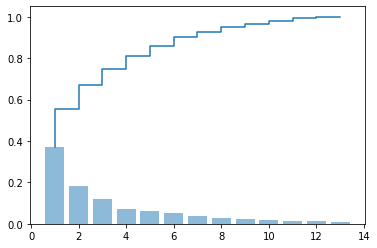

In [35]:
plt.bar(range(1,14), var_exp, alpha=0.5)
plt.step(range(1,14), cummulative_var_exp)

##### Sorting the eigen pairs by decreeasing order

In [46]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

In [47]:
#sorting
eigen_pairs.sort(key=lambda  k: k[0], reverse=True)

In [49]:
eigen_pairs[1]

(2.4160245870352255,
 array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
         0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
        -0.20716433, -0.24902536,  0.38022942]))

In [50]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))

In [52]:
# this i our 13* 2 projection matrix
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [54]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [85]:
# transformation
X_train_pca = X_train_std.dot(w)
X_train_pca.shape
y_train.shape

(124,)

In [86]:
# visualzignt he transforemed dataset

In [92]:
colors = ['r', 'g' ,'b']
markers = ['s', 'x' ,'o']

a =X_train_pca[y_train==1, 0]

In [96]:
b = X_train_pca[y_train==1, 1]

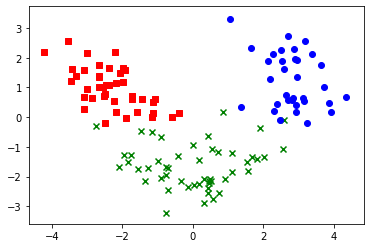

In [97]:
for l, c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label = 1, marker =m)

### PCA in Scikit Learn

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=2)

In [101]:
lr = LogisticRegression()

In [104]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [106]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
from plot_utils import plot_decision_regions

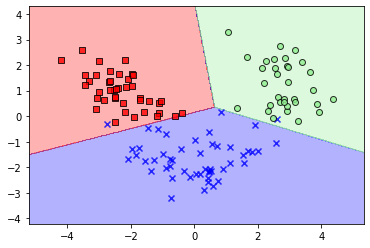

In [108]:
plot_decision_regions(X_train_pca, y_train, classifier= lr)

# Supervised Data Compression via Linear Discriminant Analysis

Algorithm

1. Standarizethe  d dimensional data
2. for each  lcass compute the d-dim mean vector
3. Construct $S_b$ - between class scatter matrix  and $S_w$ - within class scatter matrix.
4. Computer eigen vaues and vectors coresponding to $S_w^{-1}$ $S_b$
5. Sort Eigen values nad vectors by decreasign order.
6. choose k largest eigen vectors as pca.
7. Construt a transformation matrix w, eigen vectors adn columns of this matrix
8. projection using w

## Computing the Scatter Matrices

For Construcing with class scatter matrix and betwen class scatter matrxi, we use mean vectors

In [111]:
mean_vecs  = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis =0))

In [112]:
mean_vecs

[array([ 0.9065826 , -0.34973457,  0.32010329, -0.71891449,  0.50558678,
         0.88069702,  0.95894709, -0.55161049,  0.54159322,  0.23383109,
         0.58971299,  0.65631399,  1.20749382]),
 array([-0.87487963, -0.28480003, -0.37347228,  0.31571225, -0.38480347,
        -0.04332505,  0.06345321, -0.09460613,  0.07034749, -0.82860474,
         0.31436962,  0.36084258, -0.72528643]),
 array([ 0.199215  ,  0.8660339 ,  0.168163  ,  0.41484489, -0.04511771,
        -1.02855532, -1.28756034,  0.82867687, -0.77947565,  0.96494432,
        -1.20899133, -1.36215159, -0.40130076])]

#### Within Class Scatter Matrix

$S_w$ = $\sum_i^c$ $S_i$


$S_i$ = $\sum_{x \in D_j}^c$ $(x - m_i)(x - m_i)^T$

In [115]:
d =13 
S_W = 0
for label, mv in zip(range(1,4), mean_vecs):
    class_sctter = np.zeros((d,d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_sctter += (row- mv).dot((row-mv).T)
        
    S_W += class_sctter

In [117]:
S_W.shape[0]

13

In [118]:
S_W.shape[1]

13

In [119]:
# the assumpption we are making in LDA that class labels are unofrorm distributed is getting violted.
print('class lable %s' % np.bincount(y_train)[1:])

class lable [41 50 33]


In [120]:
# normalizing the scatter matrix 

In [121]:
d =13 
S_W = 0
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

        


In [124]:
S_W.shape

(13, 13)

$S_B$ = $\sum_{i=1}^c$ $n_i (m_i - m)(m_i- m)^T$

m is the overall mean, including samples from all classes

In [126]:
mean_overall = np.mean(X_train_std, axis =0)

In [127]:
mean_overall

array([ 6.89009781e-15,  1.68324136e-16,  3.79965996e-15,  2.85613826e-16,
       -3.17846108e-16,  1.66264851e-15,  1.59818395e-16, -1.19886180e-15,
        1.88827448e-15, -1.61519543e-15, -5.78390382e-16,  8.63108868e-16,
       -1.33405831e-16])

In [128]:
mean_overall.shape

(13,)

In [129]:
X_train_std.shape

(124, 13)

In [130]:
S_B = np.zeros((13,13,))

0

In [139]:
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i+1, :].shape[0]
    mean_vec = mean_vec.reshape(13,1)
    mean_overall = mean_overall.reshape(13,1)
    S_B += n *(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    

In [143]:
S_B.shape[1]

13

### Selection Linear Discriminant for new feature Subspace

The reamining stpes are similar to PCA, but here we perform Eigen Decompision of $S_w^{-1} S_b$

In [144]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [154]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

In [155]:
len(eigen_vals)

13

In [156]:
print(eigen_pairs[3])
len(eigen_pairs)

(2.902486757115975e-14, array([ 0.22731966+0.j,  0.22003265+0.j,  0.15103972+0.j, -0.299112  +0.j,
        0.00683352+0.j, -0.43167983+0.j, -0.35418733+0.j,  0.0360264 +0.j,
        0.07025721+0.j,  0.02369164+0.j,  0.22918392+0.j,  0.61443272+0.j,
       -0.19733088+0.j]))


13

In [157]:
#sorting

In [159]:
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse=True)

In [160]:
#print eigen values in desnceidn order

In [161]:
for eigen in eigen_pairs:
    print(eigen[0])

349.617808905994
172.76152218979385
2.902486757115975e-14
2.842170943040401e-14
1.8792598864684247e-14
1.8792598864684247e-14
1.570137094529844e-14
1.570137094529844e-14
6.116988201454594e-15
5.6936028514646926e-15
5.6936028514646926e-15
4.663614910753138e-15
1.3177428408410096e-15


In [162]:
#plotting

In [163]:
tot = sum(eigen_vals.real)

In [164]:
tot

522.3793310957878

In [165]:
dicr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]

In [166]:
dicr

[0.669279560071042,
 0.33072043992895817,
 5.4408181446965336e-17,
 1.1709858789058658e-17,
 1.1665609687545831e-17,
 1.1665609687545831e-17,
 2.5225784452014953e-18,
 2.4586037157750804e-18,
 2.4586037157750804e-18,
 -8.927640572934495e-18,
 -2.8927778272842606e-17,
 -2.8927778272842606e-17,
 -5.55628177521394e-17]

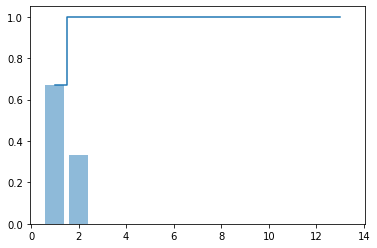

In [170]:
plt.bar(range(1,14), dicr, alpha =0.5)
plt.step(range(1,14), np.cumsum(dicr), where ='mid')

In [171]:
# Creating a Transoformation Matrix W

In [180]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))

##### projection Samples onto new feature Space

In [186]:
X_train_lda = X_train_std.dot(w)

In [187]:
X_train_lda

array([[ 1.31763265, -0.64040545],
       [-1.41851098, -1.21538078],
       [-1.32931351, -0.5900629 ],
       [-1.1433159 , -0.89422092],
       [ 1.56039117, -0.60052187],
       [-0.01855385,  1.6348451 ],
       [ 0.12421636,  2.06641481],
       [ 1.5213944 , -0.16281012],
       [ 0.42145823,  1.00594544],
       [ 0.68566013,  2.15809678],
       [ 0.24224191,  0.99645293],
       [-1.92083786, -1.30142298],
       [ 0.88133143,  0.36009543],
       [ 2.31935736, -0.78765834],
       [-0.81835994, -0.5614682 ],
       [ 1.96281626, -1.42495028],
       [-0.06022847,  2.88390278],
       [-1.3370752 , -0.24372414],
       [ 1.75602919, -1.95416927],
       [ 1.52980539, -0.67166212],
       [ 0.27544361,  2.12909038],
       [-1.40166675, -1.20956193],
       [-0.80541307,  1.26195356],
       [ 0.26386457,  1.14490582],
       [-0.45902818,  1.28427592],
       [-0.77648089,  1.85028943],
       [ 1.88968672, -0.97453859],
       [-1.70110193, -1.8852883 ],
       [-0.39981944,

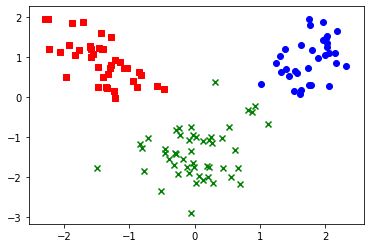

In [190]:
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
               X_train_lda[y_train ==l,1] * (-1),
               c=c, label =1, marker =m)

# LDA via Scikit Learn

In [192]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [194]:
lda = LDA(n_components=2)

In [195]:
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [196]:
lr = LogisticRegression()

In [197]:
lr.fit(X_train_lda, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

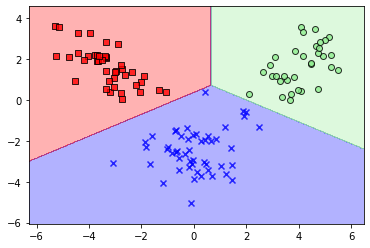

In [198]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)

# kernel PCA for non Linear mappings